# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***


## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (6,6)

In [3]:
from sklearn import linear_model

In [4]:
def draw_lines_linear_regression(img, lines, m_min, m_max, color=[255, 0, 0], thickness=8):
    
    """
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    img2 = np.copy(img)
    line_left = []
    line_right = []
    m_left = []
    m_right = []
    
    try:
        for line in lines:
            for x1,y1,x2,y2 in line:

                m = (y2 - y1) / (x2 - x1)
                if abs(m) > m_min and abs(m) < m_max:
                    if m < 0:
                        m_left.append(m)
                        line_left.append([x1,y1])
                        line_left.append([x2,y2])
                    else:
                        m_right.append(m)
                        line_right.append([x1,y1])
                        line_right.append([x2,y2])

        n, m = img.shape[0], img.shape[1]

        line_left = np.array(line_left)
        x = np.reshape(line_left[:,0], newshape=(line_left.shape[0],1))
        y = np.reshape(line_left[:,1], newshape=(line_left.shape[0],1))

        lm = linear_model.LinearRegression()
        lm.fit(y,x)
        y_max_left = n
        x_max_left = lm.predict(y_max_left)
        y_min_left = 0.65 * n
        x_min_left = lm.predict(y_min_left)

        left_min = (int(x_min_left), int(y_min_left))
        left_max = (int(x_max_left), int(y_max_left))


        line_right = np.array(line_right)
        x = np.reshape(line_right[:,0], newshape=(line_right.shape[0],1))
        y = np.reshape(line_right[:,1], newshape=(line_right.shape[0],1))

        lm = linear_model.LinearRegression()
        lm.fit(y,x)
        y_max_right = n
        x_max_right = lm.predict(y_max_right)
        y_min_right = 0.65 * n
        x_min_right = lm.predict(y_min_right)

        right_min = (int(x_min_right), int(y_min_right))
        right_max = (int(x_max_right), int(y_max_right))

        cv2.line(img2, left_min, left_max, color, thickness)
        cv2.line(img2, right_min, right_max, color, thickness)
    except:
        return img2
        
        
    return img2


def draw_lines(img, lines, m_min, m_max, color=[255, 0, 0], thickness=6):
    
    """
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    img2 = np.copy(img)
    line_left = []
    line_right = []
    m_left = []
    m_right = []
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            
            m = (y2-y1) / (x2-x1)
            if abs(m) > m_min and abs(m) < m_max:
                if m < 0:
                    m_left.append(m)
                    line_left.append([x1,y1])
                    line_left.append([x2,y2])
                else:
                    m_right.append(m)
                    line_right.append([x1,y1])
                    line_right.append([x2,y2])
                    
    n, m = img.shape[0], img.shape[1]
    
    try:
        m_left = np.mean(m_left)             
        b_left = (line_left[0][1] - line_left[0][0] * m_left) 

        m_right = np.mean(m_right)              
        b_right = (line_right[0][1] - line_right[0][0] * m_right) 

        # II way
        y_min_left = 0.65 * n
        x_min_left = np.around(((y_min_left - b_left)/m_left), decimals=1)

        y_max_left = n
        x_max_left = np.around(((y_max_left - b_left)/m_left), decimals=1)

        left_min = (int(x_min_left), int(y_min_left))
        left_max = (int(x_max_left), int(y_max_left))
        
        y_min_right = 0.65 * n
        x_min_right = np.around(((y_min_right - b_right)/m_right), decimals=1)

        y_max_right = n
        x_max_right = np.around(((y_max_right - b_right)/m_right), decimals=1)

        right_min = (int(x_min_right), int(y_min_right))
        right_max = (int(x_max_right), int(y_max_right))

        cv2.line(img2, left_min, left_max, color, thickness)
        cv2.line(img2, right_min, right_max, color, thickness)
        return img2
    except:
        return img2

In [5]:
import math

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    
def hsvscale(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    return hsv

def color_image(img, flag="gray"):
    
    if flag=="hsv":
        lower_yellow = np.array([20,100,100], dtype=np.uint8)
        upper_yellow = np.array([40,255,255], dtype=np.uint8)
        
        sensitivity = 20
        lower_white = np.array([0,0,255-sensitivity])
        upper_white = np.array([255,sensitivity,255])
        
        yellow = cv2.inRange(img, lower_yellow, upper_yellow)
        white = cv2.inRange(img, lower_white, upper_white)
        
        color = cv2.add(yellow, white)
        return color
    
    color_lower = 200
    color_upper = 255
    color = cv2.inRange(img, color_lower, color_upper)
    return color
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, m_min, m_max, flag="lr"):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    if flag != "lr":
        img = draw_lines(line_img, lines, m_min, m_max)
        return img, lines
        
    img = draw_lines_linear_regression(line_img, lines, m_min, m_max)
    return img, lines

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


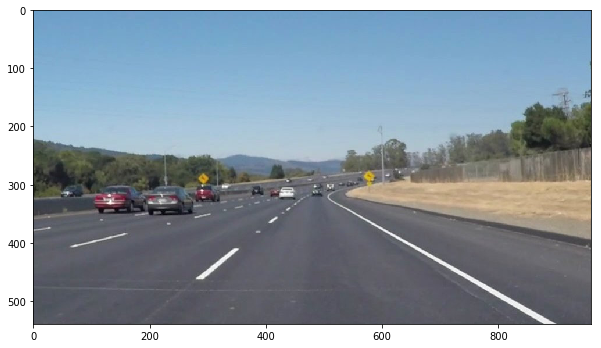

In [194]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [195]:
n, m = image.shape[0], image.shape[1] 

In [196]:
vertices = np.array([ [0.5*m, 0.5*n], [0.5*m, 0.5*n], [m, n], [0, n] ], dtype='int32')

In [197]:
reg = region_of_interest(image, [vertices])

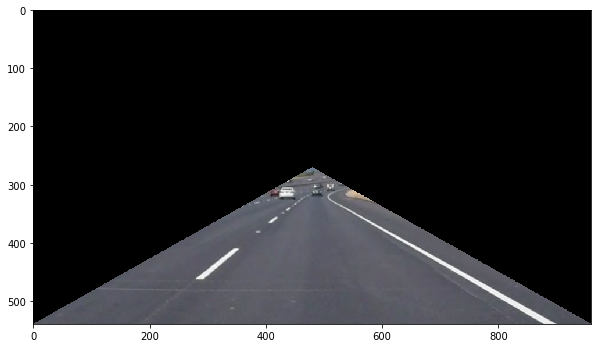

In [198]:
plt.imshow(reg)

In [199]:
gray = grayscale(reg)

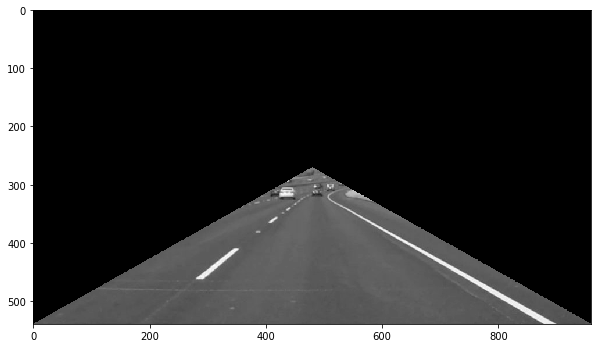

In [200]:
plt.imshow(gray, cmap="gray")

In [201]:
hsv = hsvscale(reg)

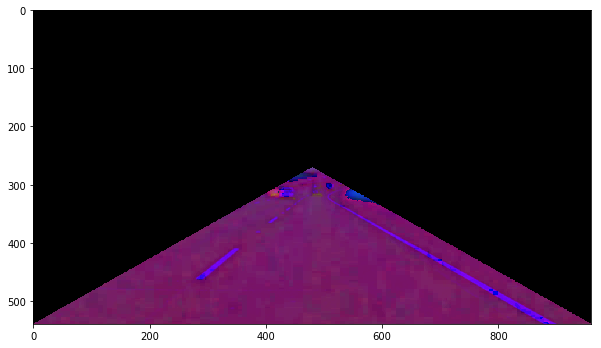

In [202]:
plt.imshow(hsv)

In [203]:
color = color_image(hsv, "hsv")

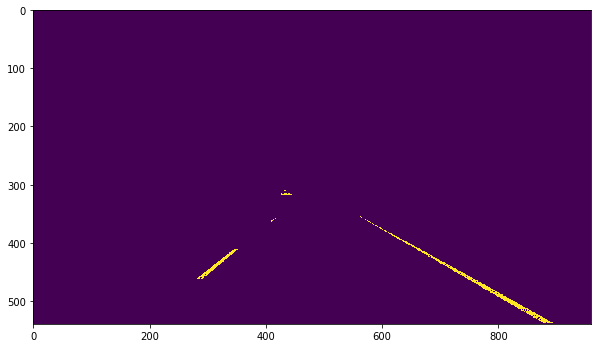

In [204]:
plt.imshow(color)

In [205]:
gauss = gaussian_blur(color, 5)

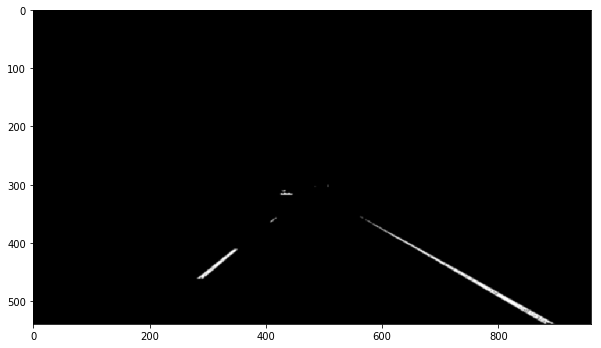

In [206]:
plt.imshow(gauss, cmap='gray')

In [207]:
lower_region = 50
upper_region = 150

In [208]:
cann = canny(gauss, lower_region, upper_region)

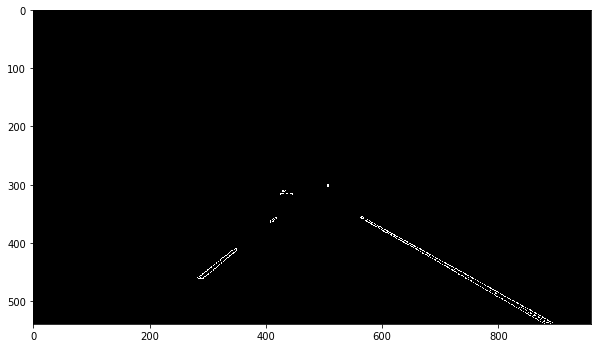

In [209]:
plt.imshow(cann, cmap='gray')

In [210]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_len = 20 #minimum number of pixels making up a line
max_line_gap = 5 
m_min = 0.5
m_max = 0.8

In [211]:
hough, lines = hough_lines(cann, rho, theta, threshold, min_line_len, max_line_gap, m_min, m_max)

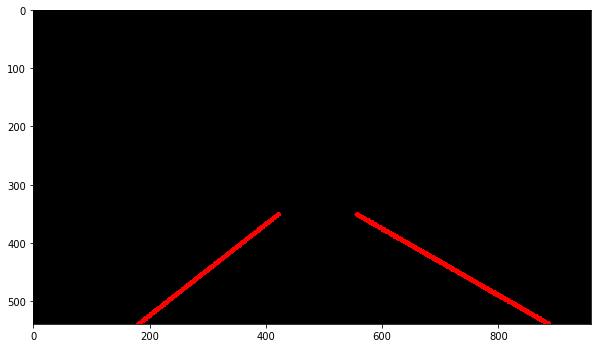

In [212]:
plt.imshow(hough)

In [213]:
def compute_m(lines):
    M = []
    
    for line in lines:
        m = (line[0][3]-line[0][1])/(line[0][2]-line[0][0])
        M.append(m)
        
    return M

M = compute_m(lines)

In [214]:
M

[0.55454545454545456,
 0.57861635220125784,
 -0.83050847457627119,
 0.55405405405405406,
 -0.80000000000000004,
 0.56140350877192979,
 0.57718120805369133,
 0.57692307692307687,
 -0.7857142857142857,
 -0.047619047619047616,
 0.57407407407407407,
 0.55555555555555558,
 -0.84210526315789469,
 0.56097560975609762,
 0.5]

In [215]:
img = weighted_img(hough, image, α=0.8, β=1., λ=0.)

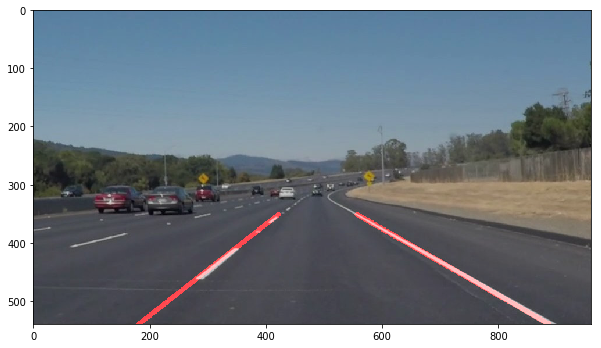

In [216]:
plt.imshow(img)

## Test Images


In [30]:
import os
plt.rcParams['figure.figsize'] = (10,10)
images = os.listdir("test_images/")

In [31]:
images

['solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg']

In [191]:
def pipeline(s, flag="image"):
    
    if flag == "video":
        image = s
    if flag == "image":
        image = mpimg.imread(s)
    
    n, m = image.shape[0], image.shape[1] 
    vertices = np.array([ [0.5*m, 0.5*n], [0.5*m, 0.5*n], [m, n], [0, n] ], dtype='int32')
    #vertices = np.array([ [0, 0.65*n], [m, 0.65*n], [m, n], [0, n] ], dtype='int32')
    
    reg = region_of_interest(image, [vertices])
    hsv = hsvscale(reg)
    
    color = color_image(hsv, "hsv")
    
    kernel_size = 5
    gauss = gaussian_blur(color, kernel_size)
    
    lower_region = 50
    upper_region = 150
    cann = canny(gauss, lower_region, upper_region)
    
    rho = 1
    theta = 1 / 180
    threshold = 10
    min_line_len = 20
    max_line_gap = 5
    m_min = 0.55
    m_max = 0.85
    
    hough, lines = hough_lines(cann, rho, theta, threshold, min_line_len, max_line_gap, m_min, m_max)
    img = weighted_img(hough, image, α=0.8, β=1., λ=0.)
    
    return img

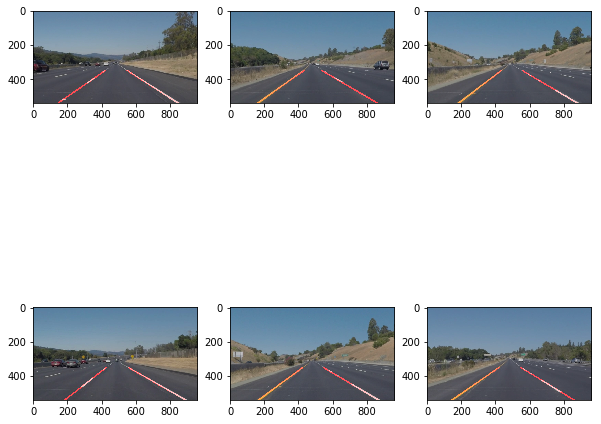

In [192]:
for i in range(len(images)):
    
    ix = i + 1
    a = plt.subplot(2,3,ix)
    img = pipeline("test_images/" + images[i])
    a.imshow(img)

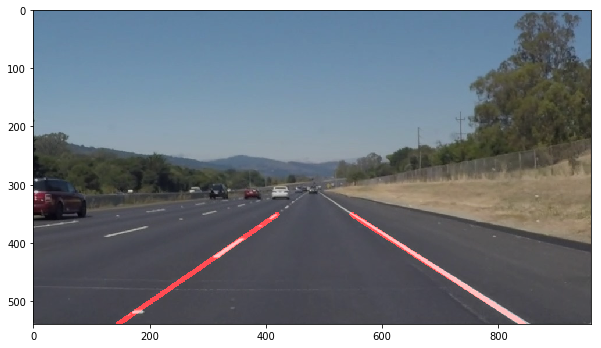

In [154]:
img = pipeline("test_images/" + images[0])
plt.imshow(img)

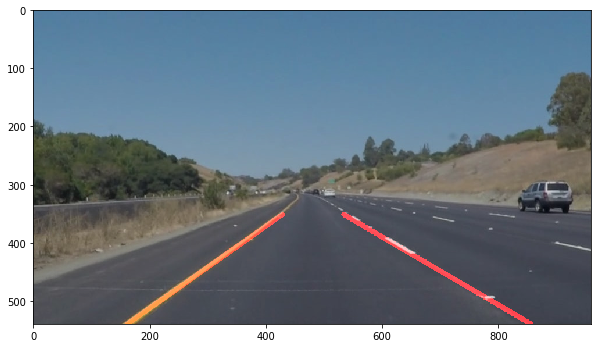

In [155]:
img = pipeline("test_images/" + images[1])
plt.imshow(img)

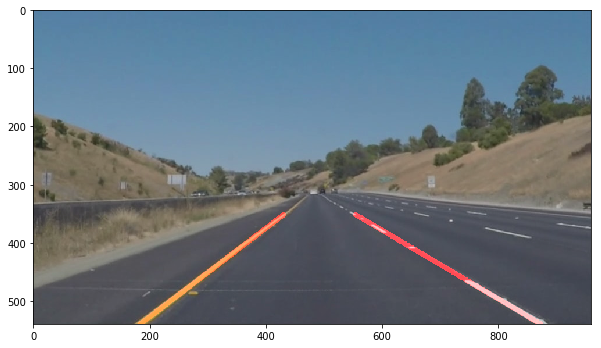

In [156]:
img = pipeline("test_images/" + images[2])
plt.imshow(img)

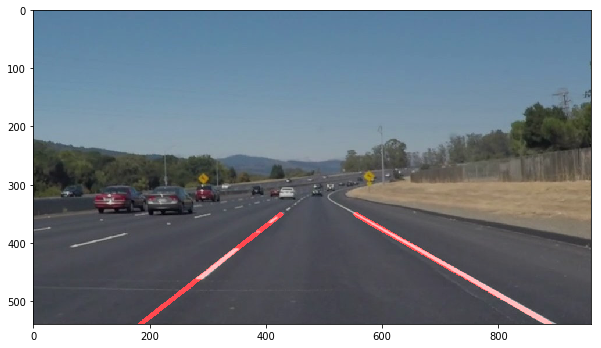

In [157]:
img = pipeline("test_images/" + images[3])
plt.imshow(img)

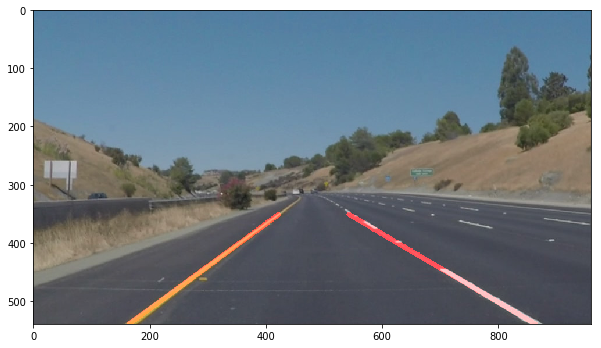

In [158]:
img = pipeline("test_images/" + images[4])
plt.imshow(img)

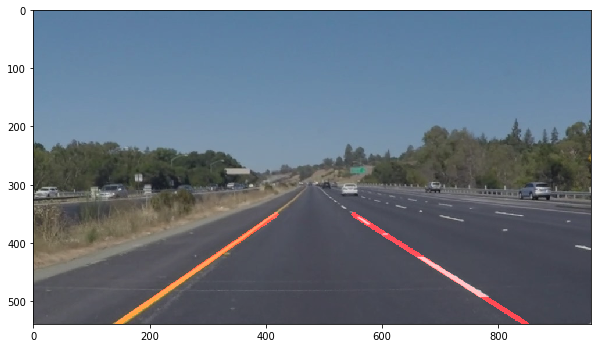

In [144]:
img = pipeline("test_images/" + images[5])
plt.imshow(img)

## Build a Lane Finding Pipeline



In [159]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
def main_image():
    for i in range(len(images)):
        
        img = pipeline("test_images/" + images[i])
        mpimg.imsave("test_images_output/" + images[i], img, format="jpg")
        #plt.imshow(img)
        #plt.savefig("test_images/" + images[i] + "_result")
main_image()        

## Test on Videos


In [160]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [161]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    result = pipeline(image, flag="video")

    return result

In [162]:
white_output = 'test_videos/solidWhiteRight_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos/solidWhiteRight_output.mp4
[MoviePy] Writing video test_videos/solidWhiteRight_output.mp4


100%|█████████▉| 221/222 [00:10<00:00, 20.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos/solidWhiteRight_output.mp4 

CPU times: user 9.52 s, sys: 308 ms, total: 9.83 s
Wall time: 12.2 s


In [163]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function



In [164]:
yellow_output = 'test_videos/solidYellowLeft_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos/solidYellowLeft_output.mp4
[MoviePy] Writing video test_videos/solidYellowLeft_output.mp4


100%|█████████▉| 681/682 [00:36<00:00, 17.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos/solidYellowLeft_output.mp4 

CPU times: user 31.2 s, sys: 900 ms, total: 32.1 s
Wall time: 38 s


In [165]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Optional Challenge


In [166]:
challenge_output = 'test_videos/challenge_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos/challenge_output.mp4
[MoviePy] Writing video test_videos/challenge_output.mp4


100%|██████████| 251/251 [00:24<00:00, 10.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos/challenge_output.mp4 

CPU times: user 15.9 s, sys: 540 ms, total: 16.4 s
Wall time: 29.6 s


In [167]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))